In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline


In [4]:
IRS_data = pd.read_csv('/Users/chrislele/Downloads/IRSIncomeByZipCode.csv')

In [5]:
IRS_data.head()

,STATE,ZIPCODE,Number of returns,Adjusted gross income (AGI),Avg AGI,Number of returns with total income,Total income amount,Avg total income,Number of returns with taxable income,Taxable income amount,Avg taxable income
0,AL,0,2022380,105089761,51.963410,2022380,106420533,52.621433,1468370,67850874,46.208295
1,AL,35004,4930,255534,51.832454,4930,258024,52.337525,4020,163859,40.760945
2,AL,35005,3300,128387,38.905152,3300,129390,39.209091,2440,70760,29.000000
3,AL,35006,1230,58302,47.400000,1230,58585,47.630081,940,36341,38.660638
4,AL,35007,11990,643708,53.687073,11990,651350,54.324437,9280,414878,44.706681


In [6]:
SAT_info = pd.read_csv('/Users/chrislele/Downloads/scores.csv')

In [7]:
SAT_info.T

,0,1,2,3,4,5,6,7,8,9,...,425,426,427,428,429,430,431,432,433,434
School ID,02M260,06M211,01M539,02M294,02M308,02M545,01M292,01M696,02M305,01M509,...,28Q690,29Q327,27Q400,27Q260,27Q309,27Q302,27Q324,27Q262,27Q351,27Q323
School Name,Clinton School Writers and Artists,Inwood Early College for Health and Informatio...,"New Explorations into Science, Technology and ...",Essex Street Academy,Lower Manhattan Arts Academy,High School for Dual Language and Asian Studies,Henry Street School for International Studies,Bard High School Early College,Urban Assembly Academy of Government and Law,Marta Valle High School,...,High School for Law Enforcement and Public Safety,Eagle Academy for Young Men III,August Martin High School,Frederick Douglass Academy VI High School,Academy of Medical Technology (College Board),"Queens High School for Information, Research, ...",Rockaway Park High School for Environmental Su...,Channel View School for Research,Rockaway Collegiate High School,Scholars' Academy
Borough,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,...,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens
Building Code,M933,M052,M022,M445,M445,M445,M056,M097,M445,M025,...,Q690,Q633,Q400,Q465,Q465,Q465,Q410,Q410,Q410,Q180
Street Address,425 West 33rd Street,650 Academy Street,111 Columbia Street,350 Grand Street,350 Grand Street,350 Grand Street,220 Henry Street,525 East Houston Street,350 Grand Street,145 Stanton Street,...,116-25 Guy R Brewer Boulevard,171-10 Linden Boulevard,156-10 Baisley Boulevard,8-21 Bay 25th Street,8-21 Bay 25th Street,8-21 Bay 25th Street,100-00 Beach Channel Drive,100-00 Beach Channel Drive,100-00 Beach Channel Drive,320 Beach 104th Street
City,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,...,Jamaica,Jamaica,Jamaica,Far Rockaway,Far Rockaway,Far Rockaway,Rockaway Park,Rockaway Park,Rockaway Park,Rockaway Park
State,NY,NY,NY,NY,NY,NY,NY,NY,NY,NY,...,NY,NY,NY,NY,NY,NY,NY,NY,NY,NY
Zip Code,10001,10002,10002,10002,10002,10002,10002,10002,10002,10002,...,11434,11434,11434,11691,11691,11691,11694,11694,11694,11694
Latitude,40.75321,40.86605,40.71873,40.71687,40.71687,40.71687,40.71376,40.71896,40.71687,40.72057,...,40.68618,40.69167,40.67553,40.60199,40.60199,40.60199,40.58601,40.58601,40.58601,40.58413
Longitude,-73.99786,-73.92486,-73.97943,-73.98953,-73.98953,-73.98953,-73.98526,-73.97607,-73.98953,-73.98567,...,-73.78408,-73.77903,-73.78343,-73.76283,-73.76283,-73.76283,-73.82309,-73.82309,-73.82309,-73.82568


In [8]:
nyc_zipcodes = SAT_info['Zip Code'].unique()

filtered_irs_data = IRS_data[IRS_data['ZIPCODE'].isin(nyc_zipcodes)][['ZIPCODE', 'Avg total income']]
filtered_irs_data.rename(columns={'ZIPCODE': 'Zip Code'}, inplace=True)

merged_data = SAT_info.merge(filtered_irs_data, on='Zip Code', how='left')

In [9]:
merged_data.T

,0,1,2,3,4,5,6,7,8,9,...,425,426,427,428,429,430,431,432,433,434
School ID,02M260,06M211,01M539,02M294,02M308,02M545,01M292,01M696,02M305,01M509,...,28Q690,29Q327,27Q400,27Q260,27Q309,27Q302,27Q324,27Q262,27Q351,27Q323
School Name,Clinton School Writers and Artists,Inwood Early College for Health and Informatio...,"New Explorations into Science, Technology and ...",Essex Street Academy,Lower Manhattan Arts Academy,High School for Dual Language and Asian Studies,Henry Street School for International Studies,Bard High School Early College,Urban Assembly Academy of Government and Law,Marta Valle High School,...,High School for Law Enforcement and Public Safety,Eagle Academy for Young Men III,August Martin High School,Frederick Douglass Academy VI High School,Academy of Medical Technology (College Board),"Queens High School for Information, Research, ...",Rockaway Park High School for Environmental Su...,Channel View School for Research,Rockaway Collegiate High School,Scholars' Academy
Borough,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,...,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens
Building Code,M933,M052,M022,M445,M445,M445,M056,M097,M445,M025,...,Q690,Q633,Q400,Q465,Q465,Q465,Q410,Q410,Q410,Q180
Street Address,425 West 33rd Street,650 Academy Street,111 Columbia Street,350 Grand Street,350 Grand Street,350 Grand Street,220 Henry Street,525 East Houston Street,350 Grand Street,145 Stanton Street,...,116-25 Guy R Brewer Boulevard,171-10 Linden Boulevard,156-10 Baisley Boulevard,8-21 Bay 25th Street,8-21 Bay 25th Street,8-21 Bay 25th Street,100-00 Beach Channel Drive,100-00 Beach Channel Drive,100-00 Beach Channel Drive,320 Beach 104th Street
City,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,...,Jamaica,Jamaica,Jamaica,Far Rockaway,Far Rockaway,Far Rockaway,Rockaway Park,Rockaway Park,Rockaway Park,Rockaway Park
State,NY,NY,NY,NY,NY,NY,NY,NY,NY,NY,...,NY,NY,NY,NY,NY,NY,NY,NY,NY,NY
Zip Code,10001,10002,10002,10002,10002,10002,10002,10002,10002,10002,...,11434,11434,11434,11691,11691,11691,11694,11694,11694,11694
Latitude,40.75321,40.86605,40.71873,40.71687,40.71687,40.71687,40.71376,40.71896,40.71687,40.72057,...,40.68618,40.69167,40.67553,40.60199,40.60199,40.60199,40.58601,40.58601,40.58601,40.58413
Longitude,-73.99786,-73.92486,-73.97943,-73.98953,-73.98953,-73.98953,-73.98526,-73.97607,-73.98953,-73.98567,...,-73.78408,-73.77903,-73.78343,-73.76283,-73.76283,-73.76283,-73.82309,-73.82309,-73.82309,-73.82568


In [10]:
missing = pd.concat([merged_data.isnull().sum(), 100 * merged_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Average Score (SAT Writing),60,13.793103
Average Score (SAT Reading),60,13.793103
Average Score (SAT Math),60,13.793103
Percent Tested,49,11.264368
Percent Asian,7,1.609195
Percent Hispanic,7,1.609195
Percent Black,7,1.609195
Percent White,7,1.609195
Student Enrollment,7,1.609195
Start Time,4,0.919540


In [11]:
NYC_Housing = pd.read_csv('/Users/chrislele/Downloads/NYC Housing Sales.csv')

In [12]:
NYC_Housing.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [13]:
NYC_Housing.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [14]:
import numpy as np

# Replace '-' with NaN
NYC_Housing['SALE PRICE'] = NYC_Housing['SALE PRICE'].replace('-', np.nan)

# Count non-null values
non_null_values = NYC_Housing['SALE PRICE'].notnull().sum()

# Count null values
null_values = len(NYC_Housing) - non_null_values

print("Number of null values in 'SALE PRICE':", null_values)

Number of null values in 'SALE PRICE': 0


In [15]:
# Convert 'SALE PRICE' column to numeric type
NYC_Housing['SALE PRICE'] = pd.to_numeric(NYC_Housing['SALE PRICE'], errors='coerce')

# Count values greater than 1000 in 'SALE PRICE' column
count_greater_than_1000 = len(NYC_Housing[NYC_Housing['SALE PRICE'] > 1000])

print("Number of values greater than 1000 in 'SALE PRICE':", count_greater_than_1000)

Number of values greater than 1000 in 'SALE PRICE': 58604


In [16]:
# Convert 'SALE PRICE' column to numeric type
NYC_Housing['GROSS SQUARE FEET'] = pd.to_numeric(NYC_Housing['GROSS SQUARE FEET'], errors='coerce')

# Count values greater than 1000 in 'SALE PRICE' column
count_greater_than_100 = len(NYC_Housing[NYC_Housing['GROSS SQUARE FEET'] > 100])

print("Number of values greater than 100 in 'GROSS SQUARE FEET':", count_greater_than_100)

Number of values greater than 100 in 'GROSS SQUARE FEET': 45514


In [17]:
# Convert 'SALE PRICE' and 'GROSS SQUARE FEET' columns to numeric type
NYC_Housing['SALE PRICE'] = pd.to_numeric(NYC_Housing['SALE PRICE'], errors='coerce')
NYC_Housing['GROSS SQUARE FEET'] = pd.to_numeric(NYC_Housing['GROSS SQUARE FEET'], errors='coerce')

# Create 'Avg_price_sqft' column by dividing 'SALE PRICE' by 'GROSS SQUARE FEET'
NYC_Housing['Avg_price_sqft'] = NYC_Housing['SALE PRICE'] / NYC_Housing['GROSS SQUARE FEET']

In [18]:
NYC_Housing['Avg_price_sqft'].info

<bound method Series.info of 0        1028.726708
1                NaN
2                NaN
3         579.374742
4        1733.477790
            ...     
84543     174.757282
84544     231.384098
84545     307.486631
84546     182.374986
84547      28.875000
Name: Avg_price_sqft, Length: 84548, dtype: float64>

In [19]:
# Remove NaN values from 'Avg_price_sqft' column
NYC_Housing_cleaned = NYC_Housing.dropna(subset=['Avg_price_sqft'])

# View head of cleaned DataFrame
NYC_Housing_cleaned['Avg_price_sqft'].head(50)

0      1028.726708
3       579.374742
4      1733.477790
6       755.522953
9       876.315932
11      838.056680
22      709.346686
73      767.712218
172     982.142857
173    1286.554922
174    1279.288985
195    1031.790296
206    1926.070039
207       0.001769
208       0.001769
209       0.001769
212    1556.850141
214    2228.187919
216    4253.056885
218    2058.823529
219    1638.888889
220    2629.848784
221    1079.963235
222     250.211690
223      65.843602
224      99.584518
227    3442.622951
230     843.137255
231     868.192581
232     965.575147
233     850.000000
234     231.248743
239      29.689600
277      23.114754
831    2025.228325
832       0.002995
834    1855.183270
928    4240.196078
929    3016.505407
931    1326.705701
932     990.243902
937    1360.759494
938    2255.866206
940    5263.157895
941    2715.189873
943    2481.854367
945     933.333333
947    2305.064322
949     726.088583
950    1143.075690
Name: Avg_price_sqft, dtype: float64

In [20]:
NYC_Housing_filtered = NYC_Housing[NYC_Housing['Avg_price_sqft'] >= 20]
NYC_Housing_filtered.head(100)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Avg_price_sqft
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,0,5,1633,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00,1028.726708
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,0,10,2272,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00,579.374742
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,0,6,2369,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00,1733.477790
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,0,8,1750,4226.0,1920,2,C4,3192840.0,2016-09-23 00:00:00,755.522953
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,0,24,4489,18523.0,1920,2,D9,16232000.0,2016-11-07 00:00:00,876.315932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,2054,1,FASHION,21 OFFICE BUILDINGS,4,833,11,,O4,1250 BROADWAY,...,55,55,30750,645977.0,1969,4,O4,565000000.0,2016-11-01 00:00:00,874.644144
2051,2055,1,FASHION,21 OFFICE BUILDINGS,4,838,12,,O6,53 WEST 36TH STREET,...,17,17,5925,64300.0,1911,4,O6,54000000.0,2016-10-27 00:00:00,839.813375
2058,2062,1,FASHION,23 LOFT BUILDINGS,4,762,61,,L1,338 WEST 39TH STREET,...,12,12,4937,55473.0,1926,4,L1,1161500.0,2017-07-21 00:00:00,20.938114
2059,2063,1,FASHION,23 LOFT BUILDINGS,4,785,75,,L3,260 WEST 36TH STREET,...,12,12,7266,81375.0,1907,4,L3,5000000.0,2017-02-09 00:00:00,61.443932


In [21]:
print(merged_data.columns)
print(NYC_Housing.columns)

Index(['School ID', 'School Name', 'Borough', 'Building Code',
       'Street Address', 'City', 'State', 'Zip Code', 'Latitude', 'Longitude',
       'Phone Number', 'Start Time', 'End Time', 'Student Enrollment',
       'Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian',
       'Average Score (SAT Math)', 'Average Score (SAT Reading)',
       'Average Score (SAT Writing)', 'Percent Tested', 'Avg total income'],
      dtype='object')
Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'Avg_price_sqft'],
      dtype='object')


In [22]:
# Check the existing column names in NYC_Housing DataFrame
print(NYC_Housing.columns)



Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'Avg_price_sqft'],
      dtype='object')


In [23]:
NYC_Housing.head(2).T

,0,1
Unnamed: 0,4,5
BOROUGH,1,1
NEIGHBORHOOD,ALPHABET CITY,ALPHABET CITY
BUILDING CLASS CATEGORY,07 RENTALS - WALKUP APARTMENTS,07 RENTALS - WALKUP APARTMENTS
TAX CLASS AT PRESENT,2A,2
BLOCK,392,399
LOT,6,26
EASE-MENT,,
BUILDING CLASS AT PRESENT,C2,C7
ADDRESS,153 AVENUE B,234 EAST 4TH STREET


In [24]:
# Rename 'ZIP CODE' column to 'Zip Code' in NYC_Housing
NYC_Housing.rename(columns={'ZIP CODE': 'Zip Code'}, inplace=True)




In [25]:
display(NYC_Housing.columns, merged_data.columns)

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'Zip Code',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'Avg_price_sqft'],
      dtype='object')

Index(['School ID', 'School Name', 'Borough', 'Building Code',
       'Street Address', 'City', 'State', 'Zip Code', 'Latitude', 'Longitude',
       'Phone Number', 'Start Time', 'End Time', 'Student Enrollment',
       'Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian',
       'Average Score (SAT Math)', 'Average Score (SAT Reading)',
       'Average Score (SAT Writing)', 'Percent Tested', 'Avg total income'],
      dtype='object')

In [26]:
# Select columns from NYC_Housing
columns_to_merge = ['BUILDING CLASS AT PRESENT', 'TOTAL UNITS', 'Zip Code','GROSS SQUARE FEET', 'SALE PRICE', 'SALE DATE', 'Avg_price_sqft']

# Merge DataFrames
#merged_data = merged_data.merge(NYC_Housing[columns_to_merge], on='Zip Code', how='left')

md = merged_data.merge(NYC_Housing[columns_to_merge].groupby('Zip Code').median().reset_index(), on='Zip Code', how='left')

# View head of the merged DataFrame
#merged_data.head()
md.T

,0,1,2,3,4,5,6,7,8,9,...,425,426,427,428,429,430,431,432,433,434
School ID,02M260,06M211,01M539,02M294,02M308,02M545,01M292,01M696,02M305,01M509,...,28Q690,29Q327,27Q400,27Q260,27Q309,27Q302,27Q324,27Q262,27Q351,27Q323
School Name,Clinton School Writers and Artists,Inwood Early College for Health and Informatio...,"New Explorations into Science, Technology and ...",Essex Street Academy,Lower Manhattan Arts Academy,High School for Dual Language and Asian Studies,Henry Street School for International Studies,Bard High School Early College,Urban Assembly Academy of Government and Law,Marta Valle High School,...,High School for Law Enforcement and Public Safety,Eagle Academy for Young Men III,August Martin High School,Frederick Douglass Academy VI High School,Academy of Medical Technology (College Board),"Queens High School for Information, Research, ...",Rockaway Park High School for Environmental Su...,Channel View School for Research,Rockaway Collegiate High School,Scholars' Academy
Borough,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,...,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens
Building Code,M933,M052,M022,M445,M445,M445,M056,M097,M445,M025,...,Q690,Q633,Q400,Q465,Q465,Q465,Q410,Q410,Q410,Q180
Street Address,425 West 33rd Street,650 Academy Street,111 Columbia Street,350 Grand Street,350 Grand Street,350 Grand Street,220 Henry Street,525 East Houston Street,350 Grand Street,145 Stanton Street,...,116-25 Guy R Brewer Boulevard,171-10 Linden Boulevard,156-10 Baisley Boulevard,8-21 Bay 25th Street,8-21 Bay 25th Street,8-21 Bay 25th Street,100-00 Beach Channel Drive,100-00 Beach Channel Drive,100-00 Beach Channel Drive,320 Beach 104th Street
City,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,...,Jamaica,Jamaica,Jamaica,Far Rockaway,Far Rockaway,Far Rockaway,Rockaway Park,Rockaway Park,Rockaway Park,Rockaway Park
State,NY,NY,NY,NY,NY,NY,NY,NY,NY,NY,...,NY,NY,NY,NY,NY,NY,NY,NY,NY,NY
Zip Code,10001,10002,10002,10002,10002,10002,10002,10002,10002,10002,...,11434,11434,11434,11691,11691,11691,11694,11694,11694,11694
Latitude,40.75321,40.86605,40.71873,40.71687,40.71687,40.71687,40.71376,40.71896,40.71687,40.72057,...,40.68618,40.69167,40.67553,40.60199,40.60199,40.60199,40.58601,40.58601,40.58601,40.58413
Longitude,-73.99786,-73.92486,-73.97943,-73.98953,-73.98953,-73.98953,-73.98526,-73.97607,-73.98953,-73.98567,...,-73.78408,-73.77903,-73.78343,-73.76283,-73.76283,-73.76283,-73.82309,-73.82309,-73.82309,-73.82568


In [27]:
md.T

,0,1,2,3,4,5,6,7,8,9,...,425,426,427,428,429,430,431,432,433,434
School ID,02M260,06M211,01M539,02M294,02M308,02M545,01M292,01M696,02M305,01M509,...,28Q690,29Q327,27Q400,27Q260,27Q309,27Q302,27Q324,27Q262,27Q351,27Q323
School Name,Clinton School Writers and Artists,Inwood Early College for Health and Informatio...,"New Explorations into Science, Technology and ...",Essex Street Academy,Lower Manhattan Arts Academy,High School for Dual Language and Asian Studies,Henry Street School for International Studies,Bard High School Early College,Urban Assembly Academy of Government and Law,Marta Valle High School,...,High School for Law Enforcement and Public Safety,Eagle Academy for Young Men III,August Martin High School,Frederick Douglass Academy VI High School,Academy of Medical Technology (College Board),"Queens High School for Information, Research, ...",Rockaway Park High School for Environmental Su...,Channel View School for Research,Rockaway Collegiate High School,Scholars' Academy
Borough,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,...,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens
Building Code,M933,M052,M022,M445,M445,M445,M056,M097,M445,M025,...,Q690,Q633,Q400,Q465,Q465,Q465,Q410,Q410,Q410,Q180
Street Address,425 West 33rd Street,650 Academy Street,111 Columbia Street,350 Grand Street,350 Grand Street,350 Grand Street,220 Henry Street,525 East Houston Street,350 Grand Street,145 Stanton Street,...,116-25 Guy R Brewer Boulevard,171-10 Linden Boulevard,156-10 Baisley Boulevard,8-21 Bay 25th Street,8-21 Bay 25th Street,8-21 Bay 25th Street,100-00 Beach Channel Drive,100-00 Beach Channel Drive,100-00 Beach Channel Drive,320 Beach 104th Street
City,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,...,Jamaica,Jamaica,Jamaica,Far Rockaway,Far Rockaway,Far Rockaway,Rockaway Park,Rockaway Park,Rockaway Park,Rockaway Park
State,NY,NY,NY,NY,NY,NY,NY,NY,NY,NY,...,NY,NY,NY,NY,NY,NY,NY,NY,NY,NY
Zip Code,10001,10002,10002,10002,10002,10002,10002,10002,10002,10002,...,11434,11434,11434,11691,11691,11691,11694,11694,11694,11694
Latitude,40.75321,40.86605,40.71873,40.71687,40.71687,40.71687,40.71376,40.71896,40.71687,40.72057,...,40.68618,40.69167,40.67553,40.60199,40.60199,40.60199,40.58601,40.58601,40.58601,40.58413
Longitude,-73.99786,-73.92486,-73.97943,-73.98953,-73.98953,-73.98953,-73.98526,-73.97607,-73.98953,-73.98567,...,-73.78408,-73.77903,-73.78343,-73.76283,-73.76283,-73.76283,-73.82309,-73.82309,-73.82309,-73.82568


In [28]:
Crime_Data = pd.read_csv('/Users/chrislele/Downloads/NYPD_Complaint_Data_Current_YTD.csv')


In [29]:
ST_ratio = pd.read_csv('/Users/chrislele/Downloads/2015_-_2016_Final_Class_Size_Report_Pupil-to-Teacher_Ratio__PTR_.csv')



In [30]:
ST_ratio.T

,0,1,2,3,4,5,6,7,8,9,...,1561,1562,1563,1564,1565,1566,1567,1568,1569,1570
DBN,15K001,12X691,11X567,09X555,12X536,12X531,11X483,11X481,12X463,12X458,...,21K344,21K337,14K322,13K265,20K227,20K223,32K168,17K122,14K071,18K068
School Name,P.S. 001 THE BERGEN,BRONX LITTLE SCHOOL,LINDEN TREE ELEMENTARY SCHOOL,MOUNT EDEN CHILDREN'S ACADEMY,PS 536,ARCHER ELEMENTARY SCHOOL,P.S. 483,P.S. 481,URBAN SCHOLARS COMMUNITY SCHOOL,SAMARA COMMUNITY SCHOOL,...,RACHEL CARSON HIGH SCHOOL FOR COASTAL STUDIES,INTERNATIONAL HIGH SCHOOL AT LAFAYETTE,FOUNDATIONS ACADEMY,DR. SUSAN S. MCKINNEY SECONDARY SCHOOL OF THE ...,J.H.S. 227 EDWARD B. SHALLOW,J.H.S. 223 THE MONTAUK,THE BROOKLYN SCHOOL FOR MATH AND RESEARCH,PATHWAYS IN TECHNOLOGY EARLY COLLEGE HIGH SCHO...,JUAN MOREL CAMPOS SECONDARY SCHOOL,I.S. 068 ISAAC BILDERSEE
School Pupil-Teacher Ratio,13.4,12.0,16.9,18.1,14.8,13.7,14.3,14.1,13.8,19.0,...,16.6,15.2,5.5,13.6,16.6,14.9,13.6,19.8,10.7,10.2


In [31]:
md.T

,0,1,2,3,4,5,6,7,8,9,...,425,426,427,428,429,430,431,432,433,434
School ID,02M260,06M211,01M539,02M294,02M308,02M545,01M292,01M696,02M305,01M509,...,28Q690,29Q327,27Q400,27Q260,27Q309,27Q302,27Q324,27Q262,27Q351,27Q323
School Name,Clinton School Writers and Artists,Inwood Early College for Health and Informatio...,"New Explorations into Science, Technology and ...",Essex Street Academy,Lower Manhattan Arts Academy,High School for Dual Language and Asian Studies,Henry Street School for International Studies,Bard High School Early College,Urban Assembly Academy of Government and Law,Marta Valle High School,...,High School for Law Enforcement and Public Safety,Eagle Academy for Young Men III,August Martin High School,Frederick Douglass Academy VI High School,Academy of Medical Technology (College Board),"Queens High School for Information, Research, ...",Rockaway Park High School for Environmental Su...,Channel View School for Research,Rockaway Collegiate High School,Scholars' Academy
Borough,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,...,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens
Building Code,M933,M052,M022,M445,M445,M445,M056,M097,M445,M025,...,Q690,Q633,Q400,Q465,Q465,Q465,Q410,Q410,Q410,Q180
Street Address,425 West 33rd Street,650 Academy Street,111 Columbia Street,350 Grand Street,350 Grand Street,350 Grand Street,220 Henry Street,525 East Houston Street,350 Grand Street,145 Stanton Street,...,116-25 Guy R Brewer Boulevard,171-10 Linden Boulevard,156-10 Baisley Boulevard,8-21 Bay 25th Street,8-21 Bay 25th Street,8-21 Bay 25th Street,100-00 Beach Channel Drive,100-00 Beach Channel Drive,100-00 Beach Channel Drive,320 Beach 104th Street
City,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,...,Jamaica,Jamaica,Jamaica,Far Rockaway,Far Rockaway,Far Rockaway,Rockaway Park,Rockaway Park,Rockaway Park,Rockaway Park
State,NY,NY,NY,NY,NY,NY,NY,NY,NY,NY,...,NY,NY,NY,NY,NY,NY,NY,NY,NY,NY
Zip Code,10001,10002,10002,10002,10002,10002,10002,10002,10002,10002,...,11434,11434,11434,11691,11691,11691,11694,11694,11694,11694
Latitude,40.75321,40.86605,40.71873,40.71687,40.71687,40.71687,40.71376,40.71896,40.71687,40.72057,...,40.68618,40.69167,40.67553,40.60199,40.60199,40.60199,40.58601,40.58601,40.58601,40.58413
Longitude,-73.99786,-73.92486,-73.97943,-73.98953,-73.98953,-73.98953,-73.98526,-73.97607,-73.98953,-73.98567,...,-73.78408,-73.77903,-73.78343,-73.76283,-73.76283,-73.76283,-73.82309,-73.82309,-73.82309,-73.82568


In [32]:
ST_ratio.columns

Index(['DBN', 'School Name', 'School Pupil-Teacher Ratio'], dtype='object')

In [33]:
md['School Name'] = md['School Name'].apply(lambda x: x.upper())


In [34]:
# Assuming 'ST_ratio' is the DataFrame containing the 'School Pupil-Teacher Ratio' column
md_merged_data = md.merge(ST_ratio[['School Name', 'School Pupil-Teacher Ratio']], on='School Name', how='left')

In [35]:
df_unmatched = pd.DataFrame(md_merged_data[md_merged_data['School Pupil-Teacher Ratio'].isnull()]['School Name'].unique())

In [36]:
df_unmatched = df_unmatched.rename(columns={0: 'School Name'})
df_unmatched['New Name'] = ''
df_unmatched

,School Name,New Name
0,CLINTON SCHOOL WRITERS AND ARTISTS,
1,URBAN ASSEMBLY ACADEMY OF GOVERNMENT AND LAW,
2,HIGH SCHOOL FOR LANGUAGE AND DIPLOMACY,
3,URBAN ASSEMBLY SCHOOL OF BUSINESS FOR YOUNG WOMEN,
4,47 AMERICAN SIGN LANGUAGE AND ENGLISH SECONDAR...,
...,...,...
85,"QUEENS HIGH SCHOOL OF TEACHING, LIBERAL ARTS, ...",
86,YOUNG WOMEN'S LEADERSHIP SCHOOL IN QUEENS,
87,QUEENS COLLEGIATE (COLLEGE BOARD),
88,HILLSIDE ARTS AND LETTERS ACADEMY,


In [37]:
df_unmatched.to_csv('lookup_names_missing.csv')

In [38]:
md_merged_data.T

,0,1,2,3,4,5,6,7,8,9,...,425,426,427,428,429,430,431,432,433,434
School ID,02M260,06M211,01M539,02M294,02M308,02M545,01M292,01M696,02M305,01M509,...,28Q690,29Q327,27Q400,27Q260,27Q309,27Q302,27Q324,27Q262,27Q351,27Q323
School Name,CLINTON SCHOOL WRITERS AND ARTISTS,INWOOD EARLY COLLEGE FOR HEALTH AND INFORMATIO...,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",ESSEX STREET ACADEMY,LOWER MANHATTAN ARTS ACADEMY,HIGH SCHOOL FOR DUAL LANGUAGE AND ASIAN STUDIES,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,BARD HIGH SCHOOL EARLY COLLEGE,URBAN ASSEMBLY ACADEMY OF GOVERNMENT AND LAW,MARTA VALLE HIGH SCHOOL,...,HIGH SCHOOL FOR LAW ENFORCEMENT AND PUBLIC SAFETY,EAGLE ACADEMY FOR YOUNG MEN III,AUGUST MARTIN HIGH SCHOOL,FREDERICK DOUGLASS ACADEMY VI HIGH SCHOOL,ACADEMY OF MEDICAL TECHNOLOGY (COLLEGE BOARD),"QUEENS HIGH SCHOOL FOR INFORMATION, RESEARCH, ...",ROCKAWAY PARK HIGH SCHOOL FOR ENVIRONMENTAL SU...,CHANNEL VIEW SCHOOL FOR RESEARCH,ROCKAWAY COLLEGIATE HIGH SCHOOL,SCHOLARS' ACADEMY
Borough,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,...,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens
Building Code,M933,M052,M022,M445,M445,M445,M056,M097,M445,M025,...,Q690,Q633,Q400,Q465,Q465,Q465,Q410,Q410,Q410,Q180
Street Address,425 West 33rd Street,650 Academy Street,111 Columbia Street,350 Grand Street,350 Grand Street,350 Grand Street,220 Henry Street,525 East Houston Street,350 Grand Street,145 Stanton Street,...,116-25 Guy R Brewer Boulevard,171-10 Linden Boulevard,156-10 Baisley Boulevard,8-21 Bay 25th Street,8-21 Bay 25th Street,8-21 Bay 25th Street,100-00 Beach Channel Drive,100-00 Beach Channel Drive,100-00 Beach Channel Drive,320 Beach 104th Street
City,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,...,Jamaica,Jamaica,Jamaica,Far Rockaway,Far Rockaway,Far Rockaway,Rockaway Park,Rockaway Park,Rockaway Park,Rockaway Park
State,NY,NY,NY,NY,NY,NY,NY,NY,NY,NY,...,NY,NY,NY,NY,NY,NY,NY,NY,NY,NY
Zip Code,10001,10002,10002,10002,10002,10002,10002,10002,10002,10002,...,11434,11434,11434,11691,11691,11691,11694,11694,11694,11694
Latitude,40.75321,40.86605,40.71873,40.71687,40.71687,40.71687,40.71376,40.71896,40.71687,40.72057,...,40.68618,40.69167,40.67553,40.60199,40.60199,40.60199,40.58601,40.58601,40.58601,40.58413
Longitude,-73.99786,-73.92486,-73.97943,-73.98953,-73.98953,-73.98953,-73.98526,-73.97607,-73.98953,-73.98567,...,-73.78408,-73.77903,-73.78343,-73.76283,-73.76283,-73.76283,-73.82309,-73.82309,-73.82309,-73.82568


In [39]:
def find_school(word):
    return ST_ratio[ST_ratio['School Name'].apply(lambda x: word in x)]

find_school("ACADEMY OF MEDICAL TECHNOLOGY")

,DBN,School Name,School Pupil-Teacher Ratio
1276,27Q309,ACADEMY OF MEDICAL TECHNOLOGY: A COLLEGE BOARD...,12.8


In [40]:
Edited_File = pd.read_csv('/Users/chrislele/Downloads/lookup_names_missing.csv')

In [41]:
df_unmatched['School Name'].update(Edited_File['School Name'])
print(df_unmatched['School Name'].head())

0                   CLINTON SCHOOL WRITERS AND ARTISTS
1         URBAN ASSEMBLY ACADEMY OF GOVERNMENT AND LAW
2               HIGH SCHOOL FOR LANGUAGE AND DIPLOMACY
3    URBAN ASSEMBLY SCHOOL OF BUSINESS FOR YOUNG WOMEN
4    47 AMERICAN SIGN LANGUAGE AND ENGLISH SECONDAR...
Name: School Name, dtype: object


In [42]:
nan_count = df_unmatched['School Name'].isna().sum()
print("Number of NaN values in 'School Name' column: ", nan_count)

Number of NaN values in 'School Name' column:  0


In [43]:
df_unmatched.head(100)

,School Name,New Name
0,CLINTON SCHOOL WRITERS AND ARTISTS,
1,URBAN ASSEMBLY ACADEMY OF GOVERNMENT AND LAW,
2,HIGH SCHOOL FOR LANGUAGE AND DIPLOMACY,
3,URBAN ASSEMBLY SCHOOL OF BUSINESS FOR YOUNG WOMEN,
4,47 AMERICAN SIGN LANGUAGE AND ENGLISH SECONDAR...,
...,...,...
85,"QUEENS HIGH SCHOOL OF TEACHING, LIBERAL ARTS, ...",
86,YOUNG WOMEN'S LEADERSHIP SCHOOL IN QUEENS,
87,QUEENS COLLEGIATE (COLLEGE BOARD),
88,HILLSIDE ARTS AND LETTERS ACADEMY,


In [44]:
def find_school(word):
    return ST_ratio[ST_ratio['School Name'].apply(lambda x: word in x)]

find_school("NYC LAB SCHOOL FOR COLLABORATIVE STUDIES")

,DBN,School Name,School Pupil-Teacher Ratio


In [45]:
print(df_unmatched.columns)

Index(['School Name', 'New Name'], dtype='object')


In [46]:
md_merged_data[(md_merged_data['Average Score (SAT Math)'].isnull())] 

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Avg total income,TOTAL UNITS,GROSS SQUARE FEET,SALE PRICE,Avg_price_sqft,School Pupil-Teacher Ratio
0,02M260,CLINTON SCHOOL WRITERS AND ARTISTS,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,...,NaN,NaN,NaN,NaN,155.101676,1.0,19453.0,1750000.0,990.243902,NaN
1,06M211,INWOOD EARLY COLLEGE FOR HEALTH AND INFORMATIO...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,...,NaN,NaN,NaN,NaN,46.846786,0.0,10230.0,845000.0,1016.835017,11.9
15,02M546,ACADEMY FOR SOFTWARE ENGINEERING,Manhattan,M460,40 Irving Place,Manhattan,NY,10003,40.73552,-73.98760,...,NaN,NaN,NaN,NaN,212.309032,0.0,7692.0,1225000.0,1103.710015,12.8
16,02M533,UNION SQUARE ACADEMY FOR HEALTH SCIENCES,Manhattan,M460,40 Irving Place,Manhattan,NY,10003,40.73552,-73.98760,...,NaN,NaN,NaN,NaN,212.309032,0.0,7692.0,1225000.0,1103.710015,13.7
28,02M047,47 AMERICAN SIGN LANGUAGE AND ENGLISH SECONDAR...,Manhattan,M047,223 East 23rd Street,Manhattan,NY,10010,40.73860,-73.98251,...,NaN,NaN,NaN,48.3%,201.070122,1.0,24011.5,1382455.5,1248.403296,NaN
31,02M422,QUEST TO LEARN,Manhattan,M440,351 West 18th Street,Manhattan,NY,10011,40.74289,-74.00213,...,NaN,NaN,NaN,NaN,247.751578,1.0,5653.0,1485000.0,1689.149194,12.4
33,02M534,HARVEST COLLEGIATE HIGH SCHOOL,Manhattan,M883,34 West 14th Street,Manhattan,NY,10011,40.73676,-73.99551,...,NaN,NaN,NaN,NaN,247.751578,1.0,5653.0,1485000.0,1689.149194,12.6
36,02M605,HUMANITIES PREPARATORY ACADEMY,Manhattan,M440,351 West 18th Street,Manhattan,NY,10011,40.74289,-74.00213,...,NaN,NaN,NaN,NaN,247.751578,1.0,5653.0,1485000.0,1689.149194,14.1
42,02M432,MURRAY HILL ACADEMY,Manhattan,M620,111 East 33rd Street,Manhattan,NY,10016,40.74611,-73.98101,...,NaN,NaN,NaN,NaN,284.625638,1.0,8510.0,882250.0,1028.298991,11.3
49,02M135,URBAN ASSEMBLY SCHOOL FOR EMERGENCY MANAGEMENT,Manhattan,M625,439 West 49th Street,Manhattan,NY,10019,40.76336,-73.99051,...,NaN,NaN,NaN,NaN,252.430785,1.0,112850.0,1007500.0,0.442180,NaN


In [96]:
new_data = md_merged_data.dropna()

In [97]:
new_data.shape

(298, 28)

In [100]:
new_data.head()

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Avg total income,TOTAL UNITS,GROSS SQUARE FEET,SALE PRICE,Avg_price_sqft,School Pupil-Teacher Ratio
2,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,657.0,601.0,601.0,91.0%,46.846786,0.0,10230.0,845000.0,1016.835017,19.0
3,02M294,ESSEX STREET ACADEMY,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,395.0,411.0,387.0,78.9%,46.846786,0.0,10230.0,845000.0,1016.835017,13.8
4,02M308,LOWER MANHATTAN ARTS ACADEMY,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,418.0,428.0,415.0,65.1%,46.846786,0.0,10230.0,845000.0,1016.835017,13.4
5,02M545,HIGH SCHOOL FOR DUAL LANGUAGE AND ASIAN STUDIES,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,613.0,453.0,463.0,95.9%,46.846786,0.0,10230.0,845000.0,1016.835017,16.6
6,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,-73.98526,...,410.0,406.0,381.0,59.7%,46.846786,0.0,10230.0,845000.0,1016.835017,8.9


In [115]:
new_data['Percent Tested'] = new_data['Percent Tested'].str.replace('%', '').astype(float) / 100

# Display the updated dataframe
print(new_data.head())

  School ID                                        School Name    Borough  \
2    01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...  Manhattan   
3    02M294                               ESSEX STREET ACADEMY  Manhattan   
4    02M308                       LOWER MANHATTAN ARTS ACADEMY  Manhattan   
5    02M545    HIGH SCHOOL FOR DUAL LANGUAGE AND ASIAN STUDIES  Manhattan   
6    01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES  Manhattan   

  Building Code       Street Address       City State  Zip Code  Latitude  \
2          M022  111 Columbia Street  Manhattan    NY     10002  40.71873   
3          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
4          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
5          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
6          M056     220 Henry Street  Manhattan    NY     10002  40.71376   

   Longitude  ... Average Score (SAT Math) Average Score (SAT Reading)  \


/var/folders/cr/5kdgskpn4_dbsjcgml40b3kr0000gn/T/ipykernel_69171/163798216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Percent Tested'] = new_data['Percent Tested'].str.replace('%', '').astype(float) / 100


In [120]:
new_data['SAT Cumulative Score'] = new_data['Average Score (SAT Math)'] + new_data['Average Score (SAT Reading)'] + new_data['Average Score (SAT Writing)']

# Display the updated dataframe
print(grouped_data.head())

          Avg total income  Avg_price_sqft  Average Score (SAT Math)  \
Zip Code                                                               
10002            46.846786     1016.835017                     481.3   
10003           212.309032     1103.710015                     450.5   
10004           350.689535      696.494817                     478.0   
10006           181.589407     1563.542836                     429.5   
10009            72.640410      892.857143                     454.0   

          Average Score (SAT Reading)  Average Score (SAT Writing)  \
Zip Code                                                             
10002                           453.9                        443.1   
10003                           446.0                        435.5   
10004                           476.0                        468.0   
10006                           419.0                        419.5   
10009                           428.0                        445.0   

    

/var/folders/cr/5kdgskpn4_dbsjcgml40b3kr0000gn/T/ipykernel_69171/1901828677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['SAT Cumulative Score'] = new_data['Average Score (SAT Math)'] + new_data['Average Score (SAT Reading)'] + new_data['Average Score (SAT Writing)']


In [121]:
new_data.T

,2,3,4,5,6,7,9,10,11,12,...,423,424,425,427,428,430,431,432,433,434
School ID,01M539,02M294,02M308,02M545,01M292,01M696,01M509,01M448,02M543,02M298,...,28Q284,28Q687,28Q690,27Q400,27Q260,27Q302,27Q324,27Q262,27Q351,27Q323
School Name,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",ESSEX STREET ACADEMY,LOWER MANHATTAN ARTS ACADEMY,HIGH SCHOOL FOR DUAL LANGUAGE AND ASIAN STUDIES,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,BARD HIGH SCHOOL EARLY COLLEGE,MARTA VALLE HIGH SCHOOL,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,NEW DESIGN HIGH SCHOOL,PACE HIGH SCHOOL,...,YORK EARLY COLLEGE ACADEMY,QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...,HIGH SCHOOL FOR LAW ENFORCEMENT AND PUBLIC SAFETY,AUGUST MARTIN HIGH SCHOOL,FREDERICK DOUGLASS ACADEMY VI HIGH SCHOOL,"QUEENS HIGH SCHOOL FOR INFORMATION, RESEARCH, ...",ROCKAWAY PARK HIGH SCHOOL FOR ENVIRONMENTAL SU...,CHANNEL VIEW SCHOOL FOR RESEARCH,ROCKAWAY COLLEGIATE HIGH SCHOOL,SCHOLARS' ACADEMY
Borough,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,...,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens
Building Code,M022,M445,M445,M445,M056,M097,M025,M446,M445,M131,...,Q008,Q774,Q690,Q400,Q465,Q465,Q410,Q410,Q410,Q180
Street Address,111 Columbia Street,350 Grand Street,350 Grand Street,350 Grand Street,220 Henry Street,525 East Houston Street,145 Stanton Street,200 Monroe Street,350 Grand Street,100 Hester Street,...,108-35 167th Street,94-50 159th Street,116-25 Guy R Brewer Boulevard,156-10 Baisley Boulevard,8-21 Bay 25th Street,8-21 Bay 25th Street,100-00 Beach Channel Drive,100-00 Beach Channel Drive,100-00 Beach Channel Drive,320 Beach 104th Street
City,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,...,Jamaica,Jamaica,Jamaica,Jamaica,Far Rockaway,Far Rockaway,Rockaway Park,Rockaway Park,Rockaway Park,Rockaway Park
State,NY,NY,NY,NY,NY,NY,NY,NY,NY,NY,...,NY,NY,NY,NY,NY,NY,NY,NY,NY,NY
Zip Code,10002,10002,10002,10002,10002,10002,10002,10002,10002,10002,...,11433,11433,11434,11434,11691,11691,11694,11694,11694,11694
Latitude,40.71873,40.71687,40.71687,40.71687,40.71376,40.71896,40.72057,40.71233,40.71687,40.71641,...,40.69694,40.701,40.68618,40.67553,40.60199,40.60199,40.58601,40.58601,40.58601,40.58413
Longitude,-73.97943,-73.98953,-73.98953,-73.98953,-73.98526,-73.97607,-73.98567,-73.9848,-73.98953,-73.99268,...,-73.78698,-73.79815,-73.78408,-73.78343,-73.76283,-73.76283,-73.82309,-73.82309,-73.82309,-73.82568


In [127]:
new_data['Percent White'] = new_data['Percent White'].str.replace('%', '').astype(float) / 100
new_data['Percent Black'] = new_data['Percent Black'].str.replace('%', '').astype(float) / 100
new_data['Percent Hispanic'] = new_data['Percent Hispanic'].str.replace('%', '').astype(float) / 100
new_data['Percent Asian'] = new_data['Percent Asian'].str.replace('%', '').astype(float) / 100

# Display the updated dataframe
print(new_data.head())

  School ID                                        School Name    Borough  \
2    01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...  Manhattan   
3    02M294                               ESSEX STREET ACADEMY  Manhattan   
4    02M308                       LOWER MANHATTAN ARTS ACADEMY  Manhattan   
5    02M545    HIGH SCHOOL FOR DUAL LANGUAGE AND ASIAN STUDIES  Manhattan   
6    01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES  Manhattan   

  Building Code       Street Address       City State  Zip Code  Latitude  \
2          M022  111 Columbia Street  Manhattan    NY     10002  40.71873   
3          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
4          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
5          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
6          M056     220 Henry Street  Manhattan    NY     10002  40.71376   

   Longitude  ... Average Score (SAT Reading) Average Score (SAT Writing) 

/var/folders/cr/5kdgskpn4_dbsjcgml40b3kr0000gn/T/ipykernel_69171/3860259273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Percent White'] = new_data['Percent White'].str.replace('%', '').astype(float) / 100
/var/folders/cr/5kdgskpn4_dbsjcgml40b3kr0000gn/T/ipykernel_69171/3860259273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Percent Black'] = new_data['Percent Black'].str.replace('%', '').astype(float) / 100
/var/folders/cr/5kdgskpn4_dbsjcgml40b3kr0000gn/T/ipykernel_69171/3

In [128]:
grouped_data = new_data.groupby('Zip Code').agg({
    'Avg total income': 'mean',
    'Avg_price_sqft': 'mean',
    'Average Score (SAT Math)': 'mean',
    'Average Score (SAT Reading)': 'mean',
    'Average Score (SAT Writing)': 'mean',
    'GROSS SQUARE FEET': 'mean',
    'SALE PRICE': 'mean',
    'School Pupil-Teacher Ratio': 'mean',
    'Percent Tested': 'mean',
    'Percent White': 'mean',
    'Percent Black': 'mean',
    'Percent Hispanic': 'mean',
    'Percent Asian': 'mean',
    'Student Enrollment': 'mean',
    'SAT Cumulative Score': 'mean'  
})

# Display the grouped data
print(grouped_data.head())

          Avg total income  Avg_price_sqft  Average Score (SAT Math)  \
Zip Code                                                               
10002            46.846786     1016.835017                     481.3   
10003           212.309032     1103.710015                     450.5   
10004           350.689535      696.494817                     478.0   
10006           181.589407     1563.542836                     429.5   
10009            72.640410      892.857143                     454.0   

          Average Score (SAT Reading)  Average Score (SAT Writing)  \
Zip Code                                                             
10002                           453.9                        443.1   
10003                           446.0                        435.5   
10004                           476.0                        468.0   
10006                           419.0                        419.5   
10009                           428.0                        445.0   

    

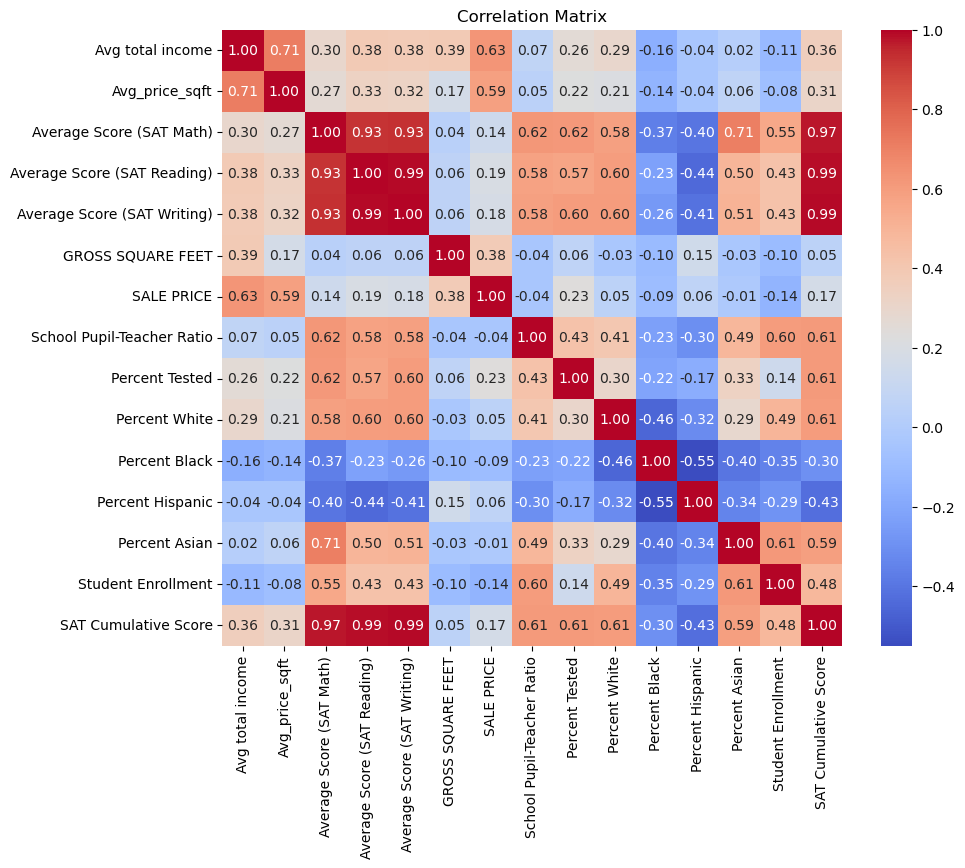

In [129]:
correlation_matrix = grouped_data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

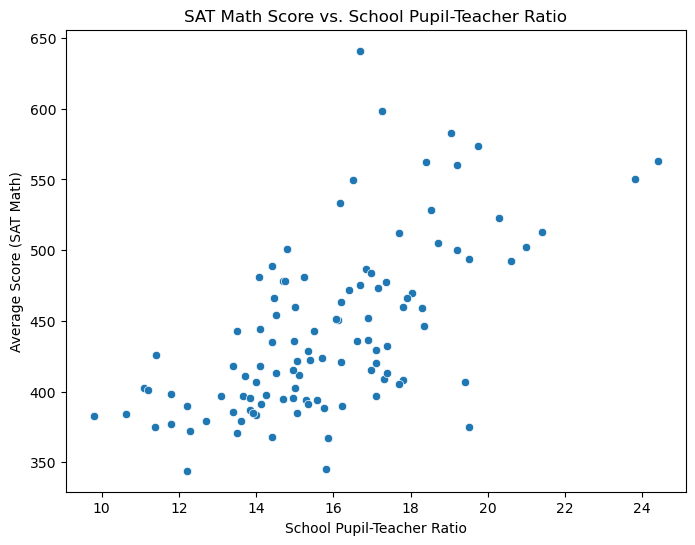

In [119]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='School Pupil-Teacher Ratio', y='Average Score (SAT Math)', data=grouped_data)
plt.title('SAT Math Score vs. School Pupil-Teacher Ratio')
plt.xlabel('School Pupil-Teacher Ratio')
plt.ylabel('Average Score (SAT Math)')
plt.show()

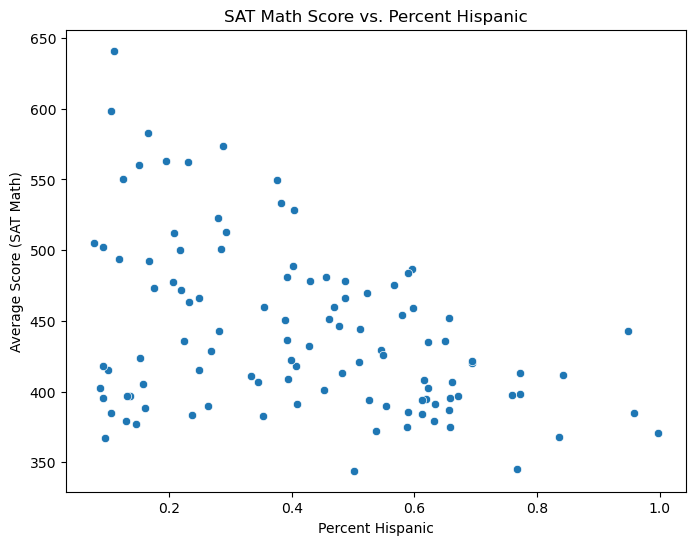

In [130]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Percent Hispanic', y='Average Score (SAT Math)', data=grouped_data)
plt.title('SAT Math Score vs. Percent Hispanic')
plt.xlabel('Percent Hispanic')
plt.ylabel('Average Score (SAT Math)')
plt.show()

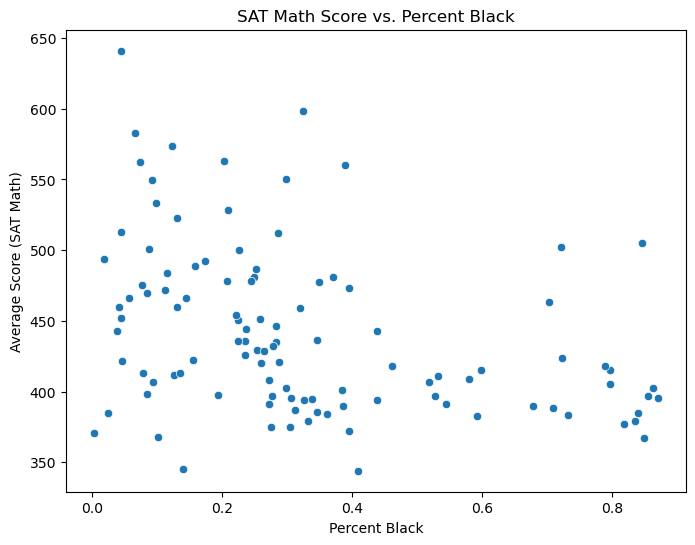

In [132]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Percent Black', y='Average Score (SAT Math)', data=grouped_data)
plt.title('SAT Math Score vs. Percent Black')
plt.xlabel('Percent Black')
plt.ylabel('Average Score (SAT Math)')
plt.show()

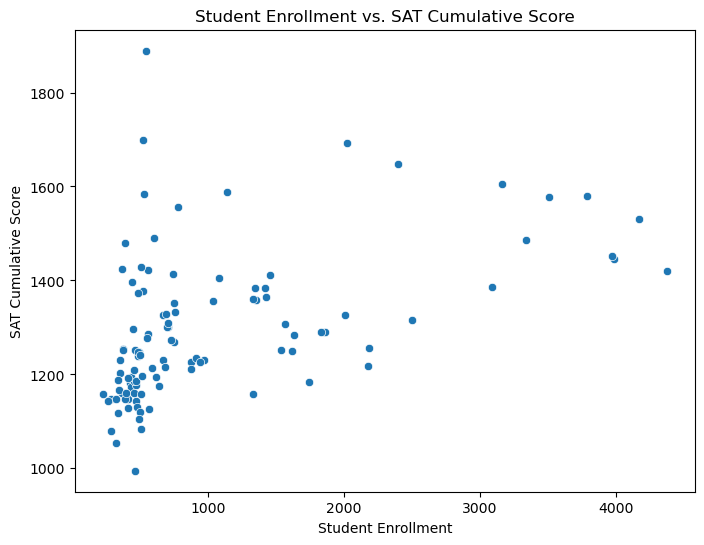

In [134]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Student Enrollment', y='SAT Cumulative Score', data=grouped_data)
plt.title('Student Enrollment vs. SAT Cumulative Score')
plt.xlabel('Student Enrollment')
plt.ylabel('SAT Cumulative Score')
plt.show()

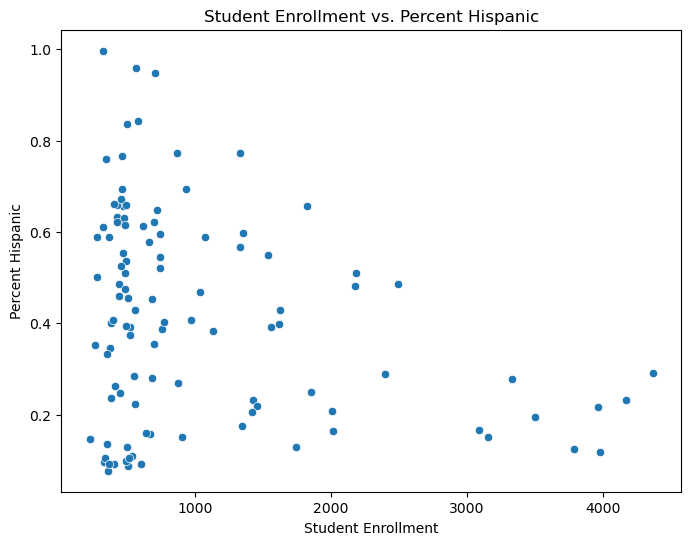

In [135]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Student Enrollment', y='Percent Hispanic', data=grouped_data)
plt.title('Student Enrollment vs. Percent Hispanic')
plt.xlabel('Student Enrollment')
plt.ylabel('Percent Hispanic')
plt.show()

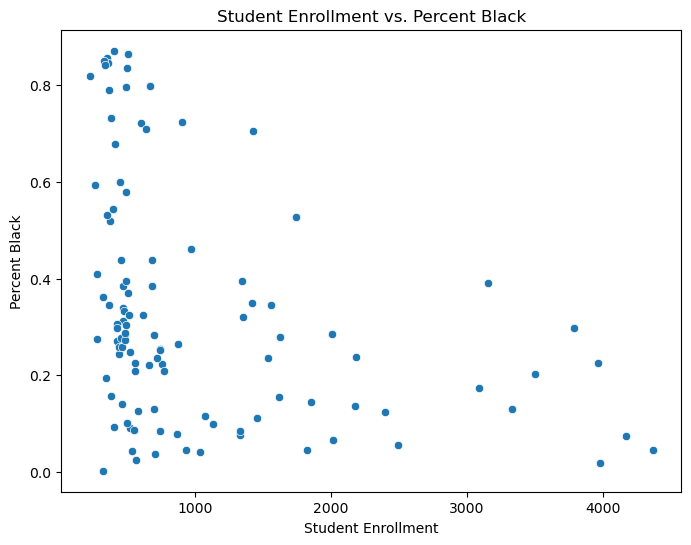

In [136]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Student Enrollment', y='Percent Black', data=grouped_data)
plt.title('Student Enrollment vs. Percent Black')
plt.xlabel('Student Enrollment')
plt.ylabel('Percent Black')
plt.show()

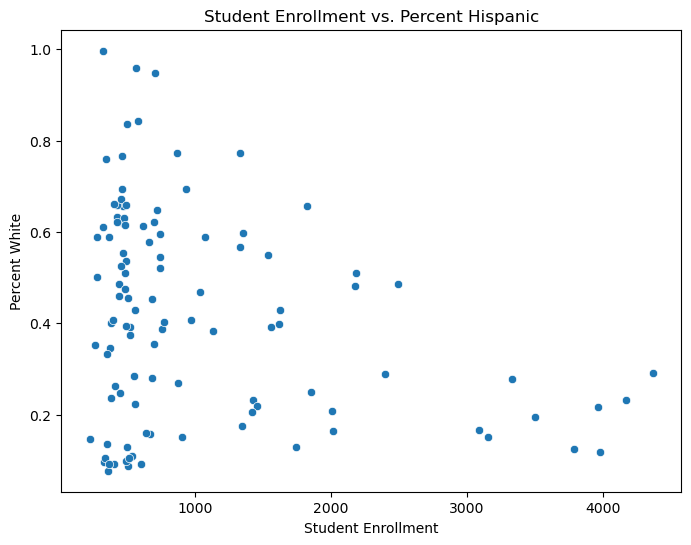

In [137]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Student Enrollment', y='Percent Hispanic', data=grouped_data)
plt.title('Student Enrollment vs. Percent Hispanic')
plt.xlabel('Student Enrollment')
plt.ylabel('Percent White')
plt.show()

In [162]:
schools_with_50_percent_white = new_data.query("`Percent White` >= .50")
num_schools_with_50_percent_white = len(schools_with_50_percent_white)
print("Number of schools with at least 50% white students:", num_schools_with_50_percent_white)

schools_with_50_percent_black = new_data.query("`Percent Black` >= .50")
num_schools_with_50_percent_black = len(schools_with_50_percent_black)
print("Number of schools with at least 50% black students:", num_schools_with_50_percent_black)

schools_with_50_percent_hispanic = new_data.query("`Percent Hispanic` >= .50")
num_schools_with_50_percent_hispanic = len(schools_with_50_percent_hispanic)
print("Number of schools with at least 50% black students:", num_schools_with_50_percent_hispanic)

Number of schools with at least 50% white students: 11
Number of schools with at least 50% black students: 70
Number of schools with at least 50% black students: 138


In [161]:
schools_with_50_percent_black = new_data.query("`Percent Black` >= .50")
num_schools_with_50_percent_black = len(schools_with_50_percent_black)
print("Number of schools with at least 50% black students:", num_schools_with_50_percent_black)

Number of schools with at least 50% black students: 70


In [165]:
# Filter schools with at least 50% black students
schools_with_50_percent_black = new_data[new_data['Percent Black'] >= .50]

# Calculate total enrollment for schools with at least 50% black students
total_enrollment_50_percent_black = schools_with_50_percent_black['Student Enrollment'].sum()

# Filter schools with at least 50% Hispanic students
schools_with_50_percent_hispanic = new_data[new_data['Percent Hispanic'] >= .50]

# Calculate total enrollment for schools with at least 50% Hispanic students
total_enrollment_50_percent_hispanic = schools_with_50_percent_hispanic['Student Enrollment'].sum()

print("Total enrollment of schools with at least 50% black students:", total_enrollment_50_percent_black)
print("Total enrollment of schools with at least 50% Hispanic students:", total_enrollment_50_percent_hispanic)

Total enrollment of schools with at least 50% black students: 35820.0
Total enrollment of schools with at least 50% Hispanic students: 81783.0


In [166]:
# Filter schools with less than 1000 students enrolled
small_schools = new_data[new_data['Student Enrollment'] < 1000]

# Calculate the percentage of black, Hispanic, and white students in small schools
percent_black_small_schools = (small_schools['Percent Black'].mean() * 100)
percent_hispanic_small_schools = (small_schools['Percent Hispanic'].mean() * 100)
percent_white_small_schools = (small_schools['Percent White'].mean() * 100)

print("Percentage of black students in small schools:", percent_black_small_schools)
print("Percentage of Hispanic students in small schools:", percent_hispanic_small_schools)
print("Percentage of white students in small schools:", percent_white_small_schools)

Percentage of black students in small schools: 36.68502024291498
Percentage of Hispanic students in small schools: 46.65384615384616
Percentage of white students in small schools: 6.905263157894735


In [170]:
percent_black = (new_data['Percent Black'].mean() * 100)
percent_hispanic = (new_data['Percent Hispanic'].mean() * 100)
percent_white = (new_data['Percent White'].mean() * 100)

print("Percentage of black students in all schools:", percent_black)
print("Percentage of hispanic students in all schools:", percent_hispanic)
print("Percentage of white students in all schools:", percent_white)

Percentage of black students in all schools: 34.179865771812096
Percentage of hispanic students in all schools: 44.55234899328859
Percentage of white students in all schools: 8.93926174496645


In [173]:
import statsmodels.api as sm

X = new_data[['Student Enrollment', 'School Pupil-Teacher Ratio']]
y_math = new_data['Average Score (SAT Math)']
y_reading = new_data['Average Score (SAT Reading)']
y_writing = new_data['Average Score (SAT Writing)']

# Add a constant term to the predictors
X = sm.add_constant(X)

# Create and fit regression models for each SAT score component
reg_math = sm.OLS(y_math, X).fit()
reg_reading = sm.OLS(y_reading, X).fit()
reg_writing = sm.OLS(y_writing, X).fit()

# Get regression summary for each model
print("Regression summary for Math scores:")
print(reg_math.summary())

print("Regression summary for Reading scores:")
print(reg_reading.summary())

print("Regression summary for Writing scores:")
print(reg_writing.summary())


Regression summary for Math scores:
                               OLS Regression Results                               
Dep. Variable:     Average Score (SAT Math)   R-squared:                       0.334
Model:                                  OLS   Adj. R-squared:                  0.329
Method:                       Least Squares   F-statistic:                     73.89
Date:                      Sun, 06 Aug 2023   Prob (F-statistic):           9.66e-27
Time:                              16:51:56   Log-Likelihood:                -1633.8
No. Observations:                       298   AIC:                             3274.
Df Residuals:                           295   BIC:                             3285.
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [138]:
import statsmodels.api as sm

# Assuming 'new_data' contains the necessary columns for analysis
# 'SAT Cumulative Score' is the dependent variable, and 'Avg total income', 'Percent White', 'School Pupil-Teacher Ratio', and 'Student Enrollment' are independent variables

# Create a new dataframe containing the independent variables
X = new_data[['Avg total income', 'Percent White', 'School Pupil-Teacher Ratio', 'Student Enrollment']]

# Add a constant column to the independent variables (required for the regression model)
X = sm.add_constant(X)

# Define the dependent variable
y = new_data['SAT Cumulative Score']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     SAT Cumulative Score   R-squared:                       0.501
Model:                              OLS   Adj. R-squared:                  0.494
Method:                   Least Squares   F-statistic:                     73.52
Date:                  Sun, 06 Aug 2023   Prob (F-statistic):           4.52e-43
Time:                          07:34:13   Log-Likelihood:                -1889.3
No. Observations:                   298   AIC:                             3789.
Df Residuals:                       293   BIC:                             3807.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------


In [142]:
import pandas as pd
import statsmodels.api as sm

# Assuming you have a DataFrame named 'new_data'

# Create interaction terms between 'Average Score (SAT Math)' and 'Race'
new_data['Math_Score_Race_White'] = new_data['Average Score (SAT Math)'] * new_data['Percent White']
new_data['Math_Score_Race_Black'] = new_data['Average Score (SAT Math)'] * new_data['Percent Black']
# Add other combinations for different races

# Create interaction terms between 'Average Score (SAT Math)' and 'School Size' or 'School Pupil-Teacher Ratio' if applicable

# Fit the multiple linear regression model with the interaction terms
X = new_data[['Avg total income', 'Percent White', 'Percent Black', 'Math_Score_Race_White', 'Math_Score_Race_Black']]
X = sm.add_constant(X)
y = new_data['SAT Cumulative Score']

model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     SAT Cumulative Score   R-squared:                       0.807
Model:                              OLS   Adj. R-squared:                  0.803
Method:                   Least Squares   F-statistic:                     243.4
Date:                  Sun, 06 Aug 2023   Prob (F-statistic):          6.93e-102
Time:                          09:20:14   Log-Likelihood:                -1748.1
No. Observations:                   298   AIC:                             3508.
Df Residuals:                       292   BIC:                             3530.
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const     

/var/folders/cr/5kdgskpn4_dbsjcgml40b3kr0000gn/T/ipykernel_69171/4099881213.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Math_Score_Race_White'] = new_data['Average Score (SAT Math)'] * new_data['Percent White']
/var/folders/cr/5kdgskpn4_dbsjcgml40b3kr0000gn/T/ipykernel_69171/4099881213.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Math_Score_Race_Black'] = new_data['Average Score (SAT Math)'] * new_data['Percent Black']


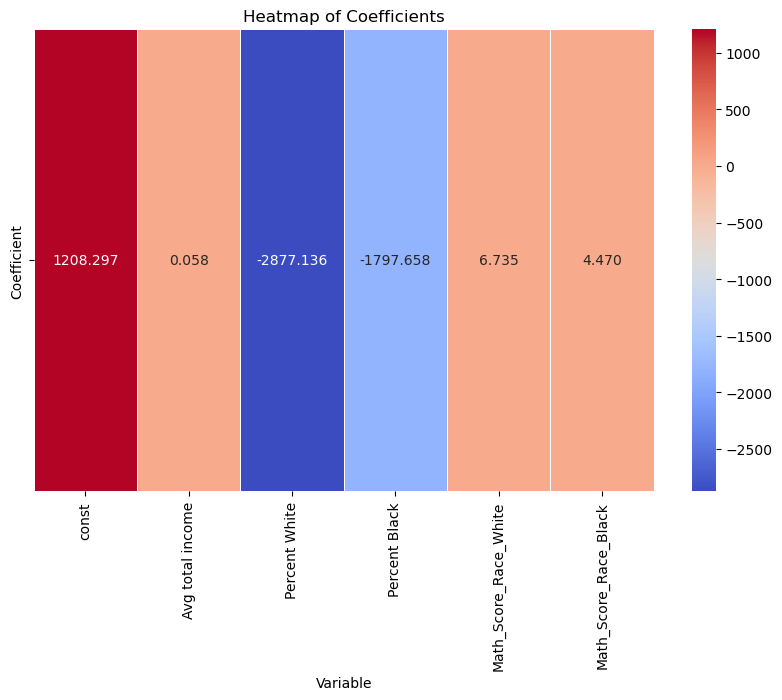

In [143]:
import seaborn as sns


coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.params})
coefficients = coefficients.set_index('Variable')

# Plot a heatmap of the coefficients
plt.figure(figsize=(10, 6))
sns.heatmap(coefficients.transpose(), cmap='coolwarm', annot=True, fmt=".3f", linewidths=0.5)
plt.title("Heatmap of Coefficients")
plt.show()

In [145]:
new_data.describe()

,Zip Code,Latitude,Longitude,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),...,Percent Tested,Avg total income,TOTAL UNITS,GROSS SQUARE FEET,SALE PRICE,Avg_price_sqft,School Pupil-Teacher Ratio,SAT Cumulative Score,Math_Score_Race_White,Math_Score_Race_Black
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,...,298.000000,298.000000,298.000000,298.000000,2.980000e+02,298.000000,298.000000,298.000000,298.000000,298.000000
mean,10745.637584,40.739713,-73.925858,784.855705,0.089393,0.341799,0.445523,0.106279,432.348993,422.852349,...,0.640191,76.534842,1.308725,8406.862416,5.960630e+05,inf,15.415436,1272.067114,44.399497,141.380953
std,534.864490,0.084404,0.070462,823.219018,0.137529,0.249453,0.243546,0.146321,71.394897,61.924672,...,0.194769,86.663253,0.755668,24278.831643,4.733559e+05,NaN,3.015118,194.444115,74.653493,99.694186
min,10002.000000,40.528230,-74.192150,142.000000,0.000000,0.000000,0.033000,0.000000,317.000000,302.000000,...,0.185000,23.858969,0.000000,0.000000,1.000000e+05,0.442180,8.400000,924.000000,0.000000,0.000000
25%,10314.000000,40.679530,-73.979260,387.500000,0.013000,0.151250,0.223250,0.016000,384.000000,385.000000,...,0.488000,30.625892,1.000000,1532.000000,3.006250e+05,202.035900,13.400000,1151.250000,5.112250,70.857500
50%,10472.500000,40.734965,-73.927030,482.500000,0.027000,0.284000,0.454500,0.047000,414.000000,411.000000,...,0.633500,41.524048,1.000000,2115.000000,4.417250e+05,378.787879,15.350000,1223.500000,11.043000,117.776000
75%,11216.750000,40.820045,-73.888230,678.250000,0.099000,0.463250,0.630500,0.119750,459.750000,445.000000,...,0.794250,65.057690,2.000000,3600.000000,8.450000e+05,961.337031,17.200000,1332.250000,42.481250,190.289500
max,11694.000000,40.887920,-73.739650,5447.000000,0.799000,0.912000,1.000000,0.889000,714.000000,672.000000,...,1.000000,497.786169,3.000000,143730.000000,4.210000e+06,inf,24.400000,2041.000000,394.706000,477.225000


In [146]:
new_data['Percent White'].mean()

0.0893926174496645